## 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# import shutil

# filename = 'delivery_raw.csv.zip'
# extract_dir = './'
# archive_format = 'zip'

# shutil.unpack_archive(filename, extract_dir, archive_format)

In [2]:
df = pd.read_csv('delivery_raw.csv', delimiter='	')

In [5]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [7]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [8]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift                                   16262
total_busy                                      16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [3]:
df_original = df.copy()

## 1. 시간 속성

### I. 걸린 시간 계산

배달에 걸린 시간 열을 하나 새로 만들자. `actual_delivery_time` - `created_at` 

In [4]:
time_spent = pd.to_datetime(df['actual_delivery_time']) - pd.to_datetime(df['created_at'])

In [5]:
df['d_time'] = time_spent.dt.seconds

시간 분포 확인

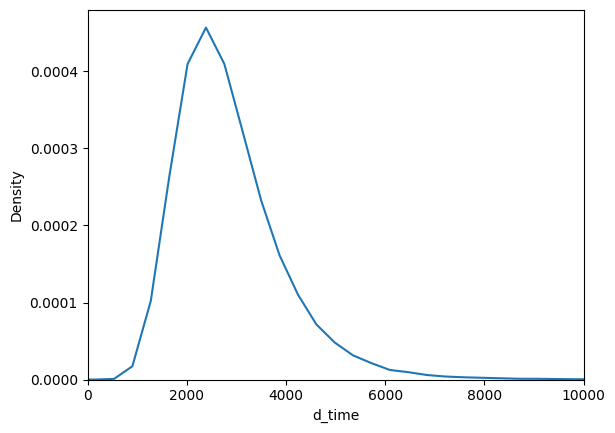

In [6]:
sns.kdeplot(data=df['d_time'])

plt.xlim(0,10000)
plt.show()

In [7]:
df['d_time'].mean()

2862.304815597125

배달 평균 시간이 3000초 정도 걸리며, 왼쪽으로 살짝 편향된 가우시안 분포를 따르는 것 같다

### II. 지역 분포 확인

In [9]:
market = df[['market_id','d_time']]
market = market.dropna(subset='d_time')
market = market.fillna('UNK')

market

,market_id,d_time
0,1.0,3779.0
1,2.0,4024.0
2,3.0,1781.0
3,3.0,3075.0
4,3.0,2390.0
...,...,...
197423,1.0,3907.0
197424,1.0,3383.0
197425,1.0,3008.0
197426,1.0,3907.0


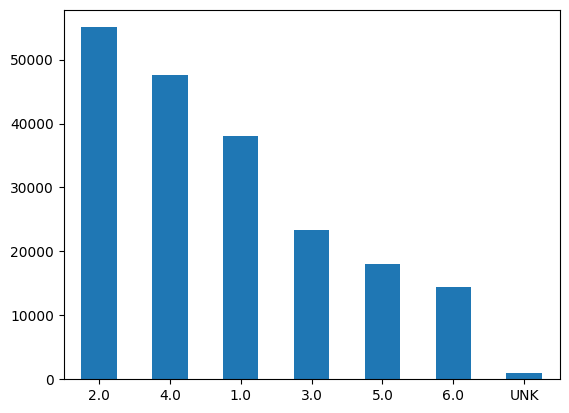

In [10]:
market['market_id'].value_counts().plot(kind='bar')

plt.xticks(rotation=0)
plt.show()


2 구역에서 제일 많은 배달 건이 확인되었다.

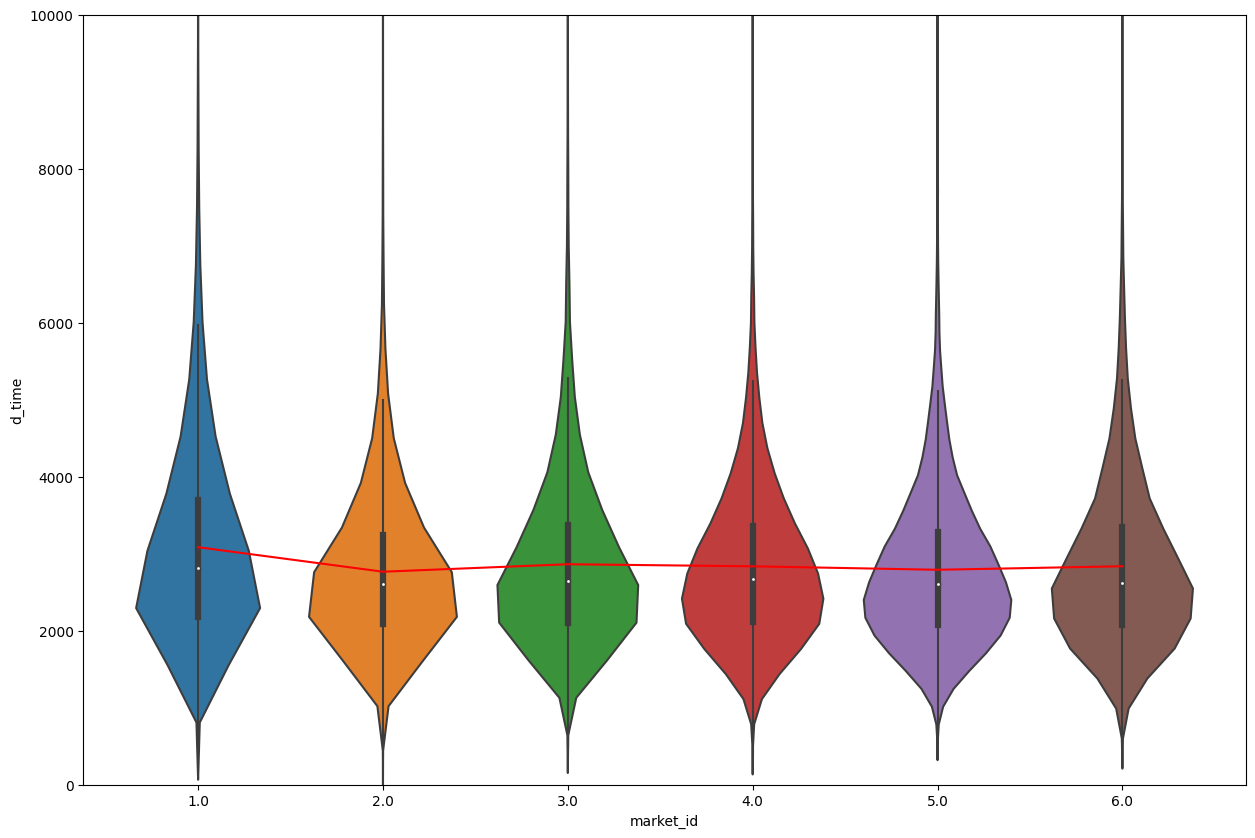

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
mean_dtime_by_market_id = df.groupby('market_id')['d_time'].mean()

sns.violinplot(data=df, x='market_id', y='d_time', ax=ax)
sns.lineplot(x=mean_dtime_by_market_id.index-1 ,y=mean_dtime_by_market_id, color='red', ax=ax,)

plt.ylim(0,10000)
plt.show()

각 지역별 배달 시간 분포이다. 지역의 차이는 배달 시간에 큰 영향을 끼치는 것 같지는 않다

### III. 배달을 받은 시간

- 특정 시간대에는 특히 배달이 늦지 않았을까?

In [12]:
df['created_hour'] = pd.to_datetime(df['created_at']).dt.hour

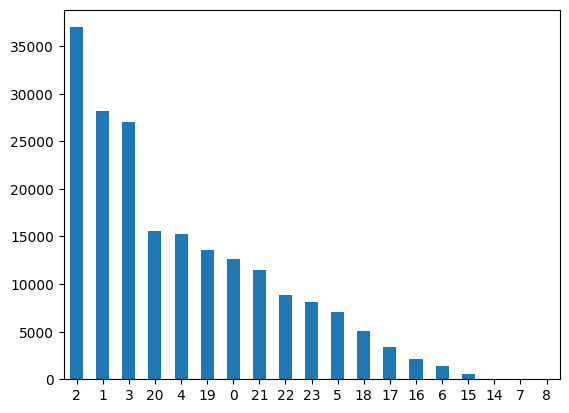

In [13]:
df['created_hour'].value_counts().plot(kind='bar')

plt.xticks(rotation=0)
plt.show()

새벽 2시 대에 가장 만호은 배달음식 주문이 있었다.

In [14]:
print("8시에 주문된 건 수: ",df['created_hour'].value_counts().loc[8])

8시에 주문된 건 수:  2


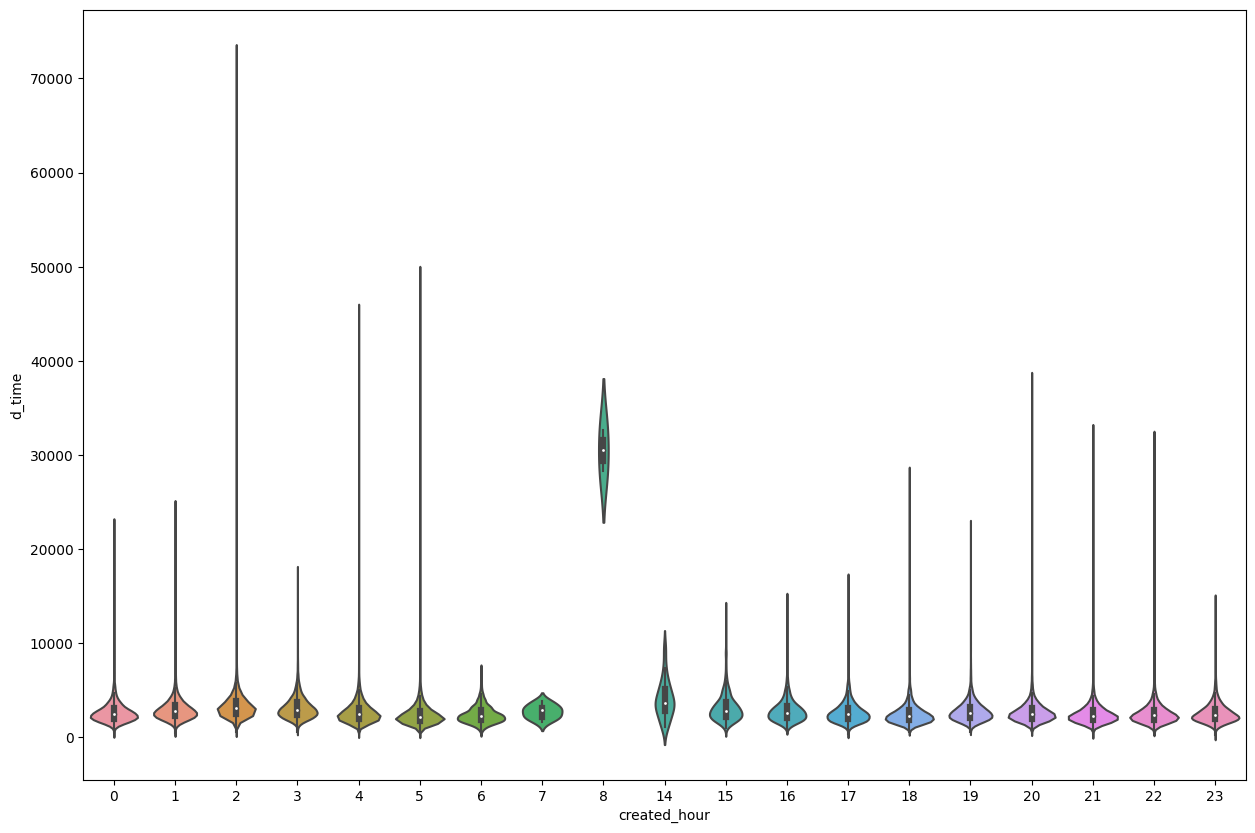

In [15]:
fig, ax = plt.subplots(figsize=(15,10))

sns.violinplot(data=df, x='created_hour', y='d_time', ax=ax)

plt.show()

`8` 시에 특히 배달 시간이 오래 걸렸다. 그렇지만 배달음식 건수는 가장 적었기 때문에 `8`시는 신뢰성이 다른 시간대에 비해 떨어진다. 그러므로 시간대도 그렇게 큰 영향을 끼치는 것 같지는 않다.

## 2. 식당 속성

### I. 주문 방식

- 배달의 주문방식에 따라 배달 시간이 다르지 않을까?

In [21]:
df['order_protocol'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

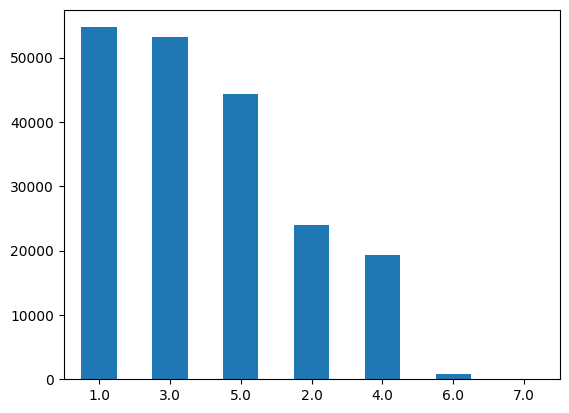

In [22]:
df['order_protocol'].value_counts().plot(kind='bar')

plt.xticks(rotation=0)
plt.show()

In [23]:
print("6번 방식으로 주문된 건 수: ",df['order_protocol'].value_counts().loc[6])

6번 방식으로 주문된 건 수:  794


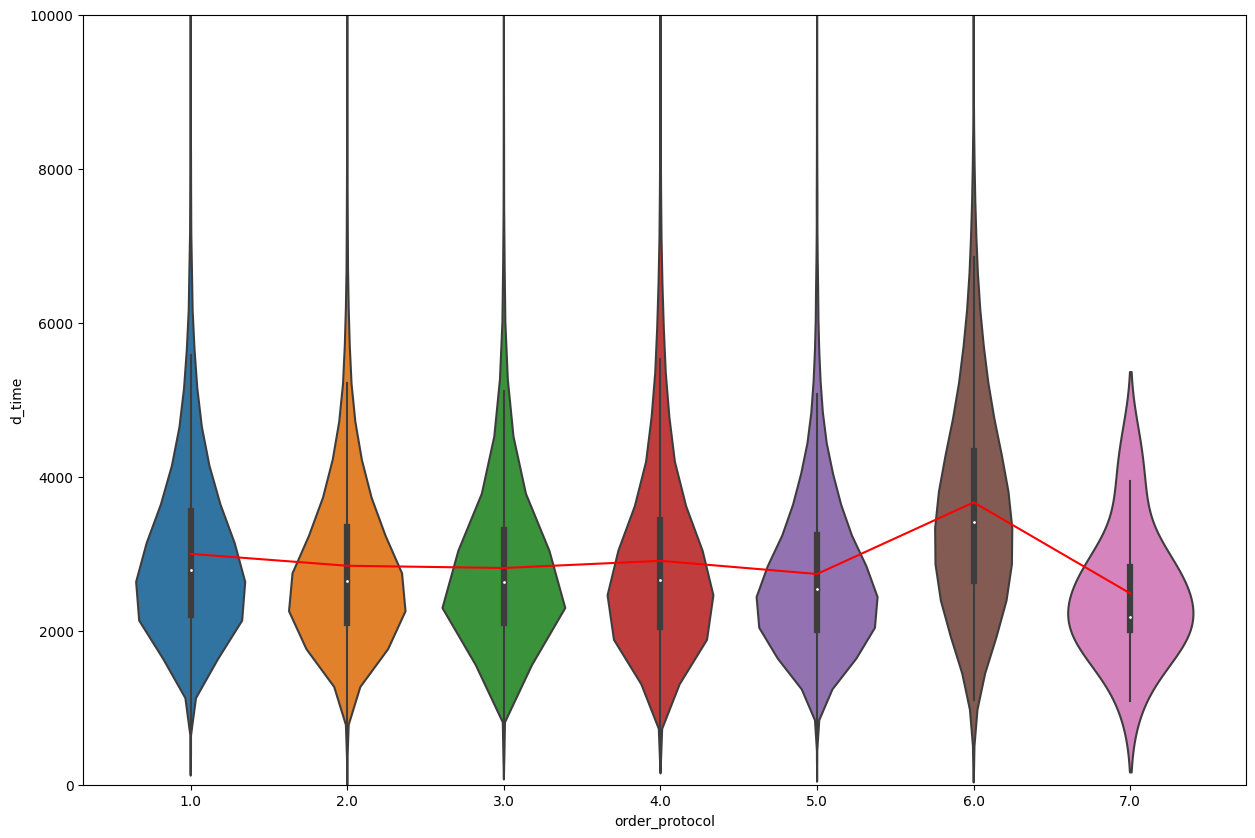

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
mean_dtime_by_order = df.groupby('order_protocol')['d_time'].mean()

sns.violinplot(data=df, x='order_protocol', y='d_time', ax=ax)
sns.lineplot(x=mean_dtime_by_order.index-1 ,y=mean_dtime_by_order, color='red', ax=ax,)

plt.ylim(0,10000)
plt.show()

`6` 번 방식일 경우 특히나 오래 걸린 것을 확인할 수 있지만 이 역시 다른 데이터들에 비해 양이 적다. 하지만 `시간`보다는 많은 양을 가지고 있기 때문에 사용하도록 하겠다.

### II. 식당의 카테고리

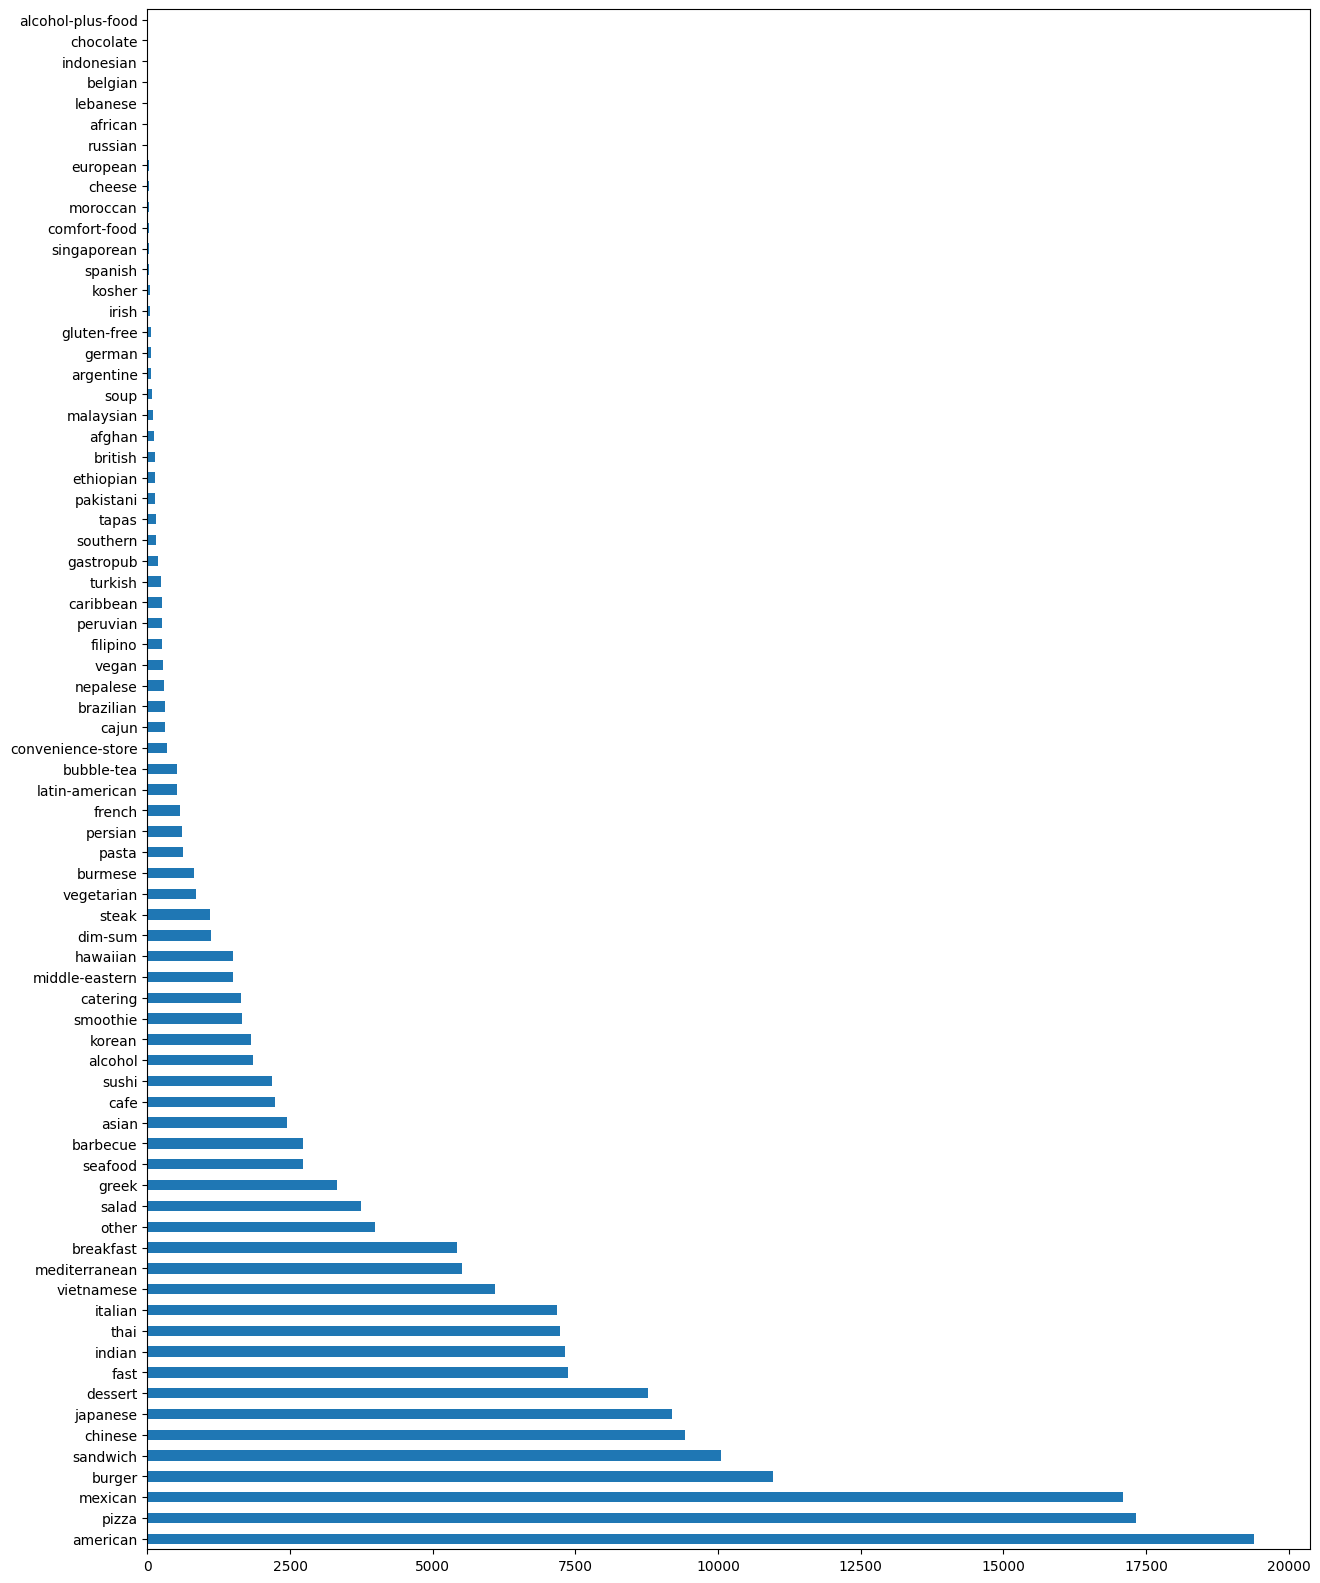

In [16]:
plt.figure(figsize=(15,20))

df['store_primary_category'].value_counts().plot(kind='barh')

plt.show()

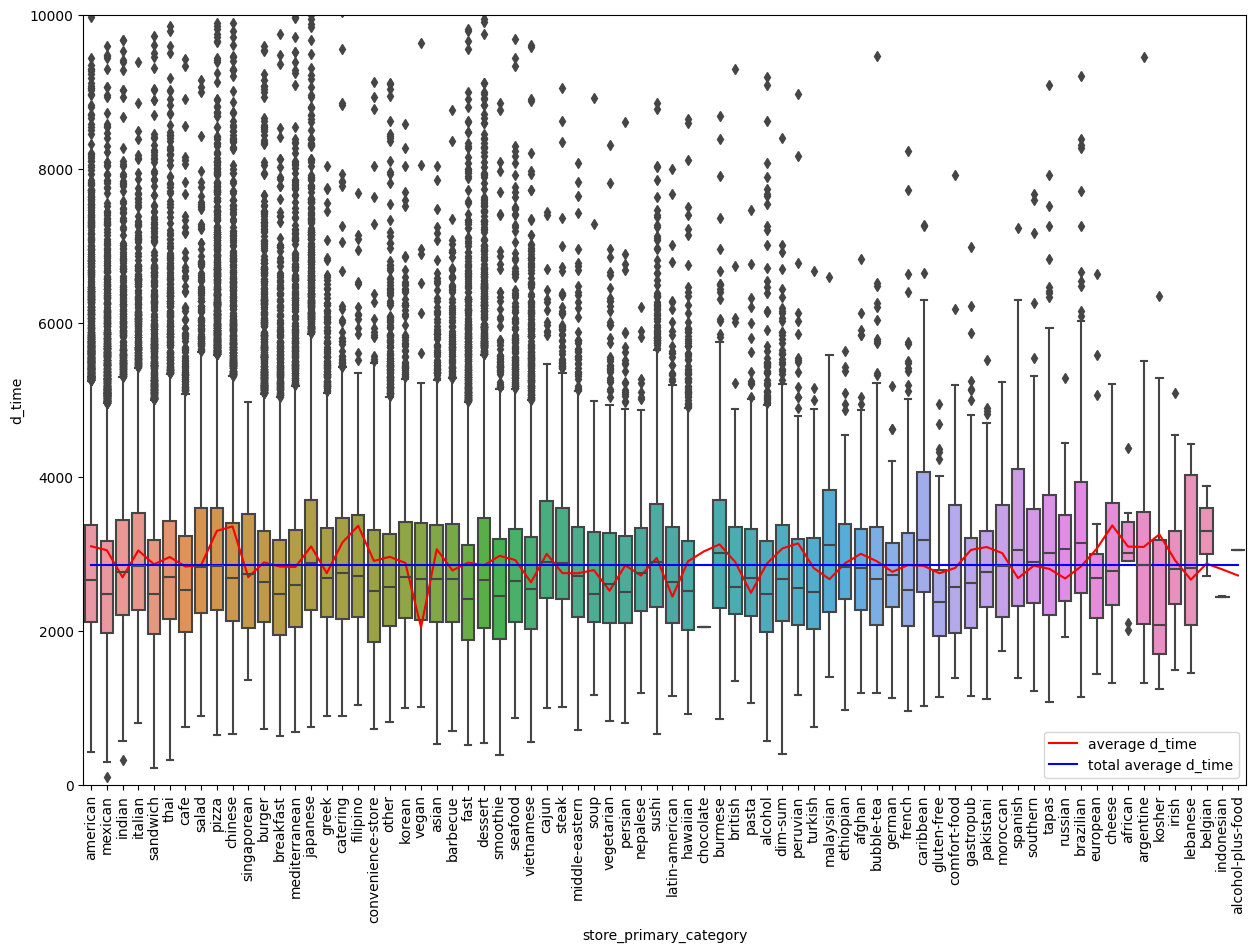

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
mean_dtime_by_market_cat = df.groupby('store_primary_category')['d_time'].mean()

sns.boxplot(data=df, x='store_primary_category', y='d_time', ax=ax)
sns.lineplot(x=mean_dtime_by_market_cat.index,y=mean_dtime_by_market_cat, color='red', ax=ax, label='average d_time')
sns.lineplot(x=mean_dtime_by_market_cat.index,y=[df['d_time'].mean()]*len(mean_dtime_by_market_cat),color='blue', label='total average d_time')

plt.xticks(rotation=90)
plt.ylim(0,10000)
plt.show()

평균 배달시간보다 느리면 1, 그렇지 않으면 0으로 범주화하겠다.

In [18]:
dtime_by_market_cat_bin = (mean_dtime_by_market_cat > df['d_time'].mean()).astype('int')
dtime_by_market_cat_bin = pd.DataFrame({
    "store_primary_category" : dtime_by_market_cat_bin.index,
    "store_category_bin":dtime_by_market_cat_bin.values
})

In [19]:
df = pd.merge(df,dtime_by_market_cat_bin)

In [20]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,d_time,created_hour,store_category_bin
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,22,1
1,3.0,2015-02-12 03:12:08,2015-02-12 03:44:48,2004,american,5.0,5,6200,5,500,1800,34.0,30.0,28.0,251,86.0,1960.0,3,1
2,3.0,2015-02-18 04:26:00,2015-02-18 05:05:00,2004,american,5.0,2,2800,2,1000,1800,18.0,15.0,15.0,251,821.0,2340.0,4,1
3,3.0,2015-02-15 04:09:59,2015-02-15 04:50:02,2004,american,5.0,4,5800,4,600,2400,33.0,33.0,42.0,251,179.0,2403.0,4,1
4,3.0,2015-02-17 21:34:38,2015-02-17 22:04:26,2004,american,5.0,2,2641,2,625,1240,27.0,22.0,24.0,251,89.0,1788.0,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192663,3.0,2015-02-17 18:15:06,2015-02-17 19:19:55,691,belgian,1.0,2,1885,2,580,1245,6.0,5.0,5.0,446,811.0,3889.0,18,1
192664,3.0,2015-01-30 19:44:54,2015-01-30 20:30:04,691,belgian,1.0,2,1895,2,640,1130,26.0,22.0,26.0,446,349.0,2710.0,19,1
192665,6.0,2015-01-29 00:10:16,2015-01-29 00:51:04,1763,indonesian,1.0,1,1050,1,995,995,NaN,NaN,NaN,446,840.0,2448.0,0,0
192666,6.0,2015-02-05 21:50:49,2015-02-05 22:31:31,1763,indonesian,1.0,2,2190,2,995,1150,NaN,NaN,NaN,446,469.0,2442.0,21,0


특정 음식 카테고리에서는 배달시간이 짧고 긴 것을 확인할 수 있으므로, 사용해보도록 하겠다.

## 3. 주문 속성

### I. 총 개수

- 조리할 음식이 많을수록 배달 시간이 늘어나지 않을까?

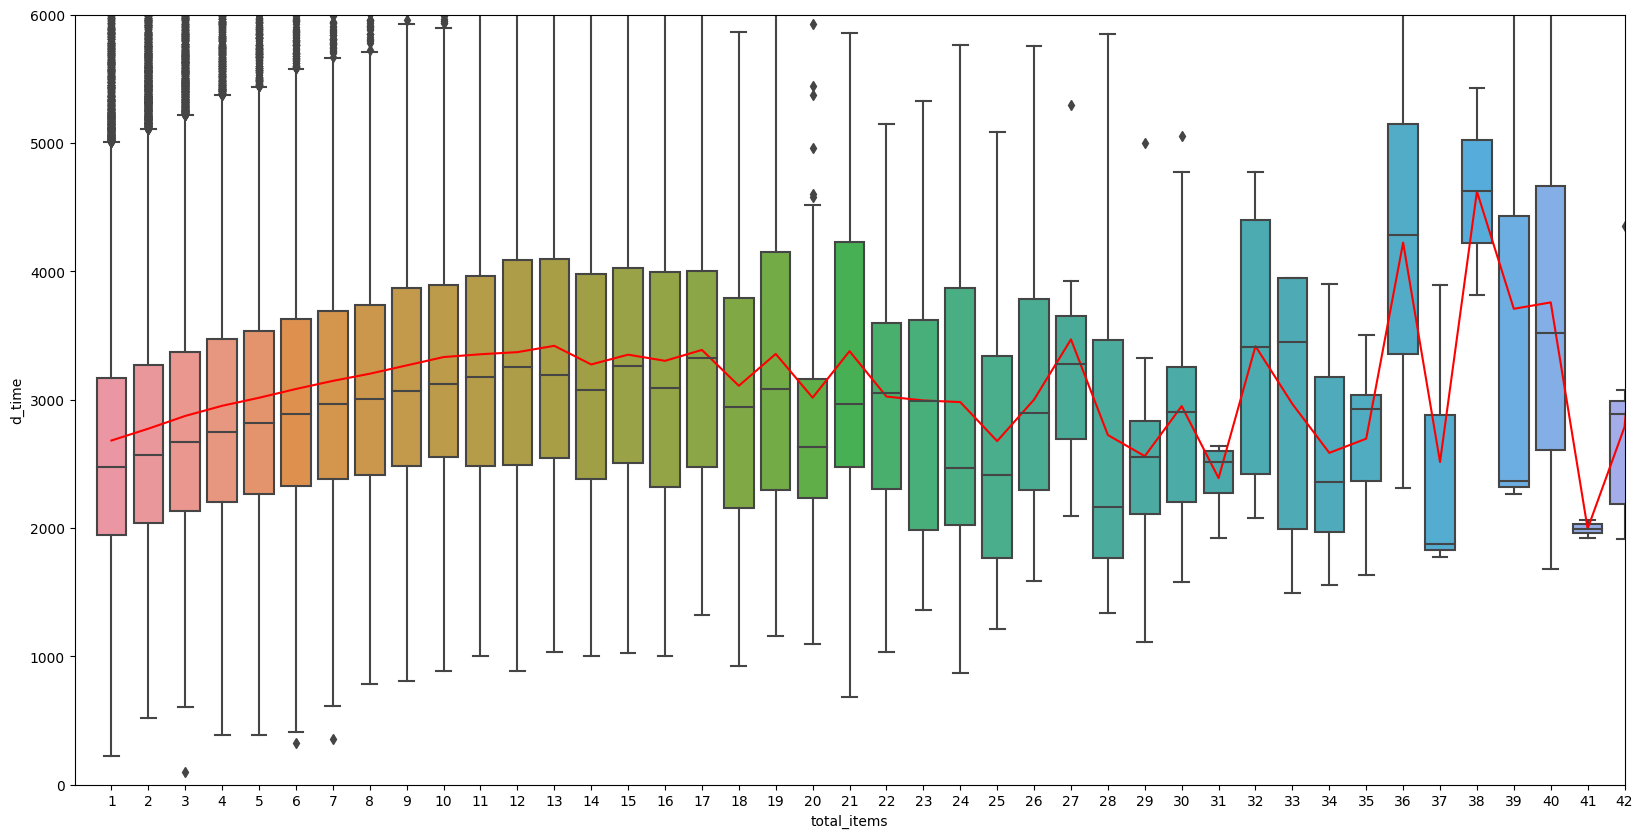

In [30]:
plt.figure(figsize=(20,10))
mean_dtime_by_items = df.groupby('total_items')['d_time'].mean()

sns.boxplot(data=df, x='total_items', y='d_time')
sns.lineplot(x=mean_dtime_by_items.index-1, y=mean_dtime_by_items, color='red')

plt.xlim(-1,41)
plt.ylim(0,6000)
plt.show()

`13` 개 까지는 배달시간이 단조롭게 증가하다가 14부터 알수없는 그래프가 형성된 것을 알 수 있다. 따라서 총 개수가 배달 시간에 큰 영향을 주는 것 같아보이지는 않는다.

### II. 비중복 아이템 개수

- 더욱 다양한 음식을 조리할수록 배달 시간이 늘어나지 않을까?

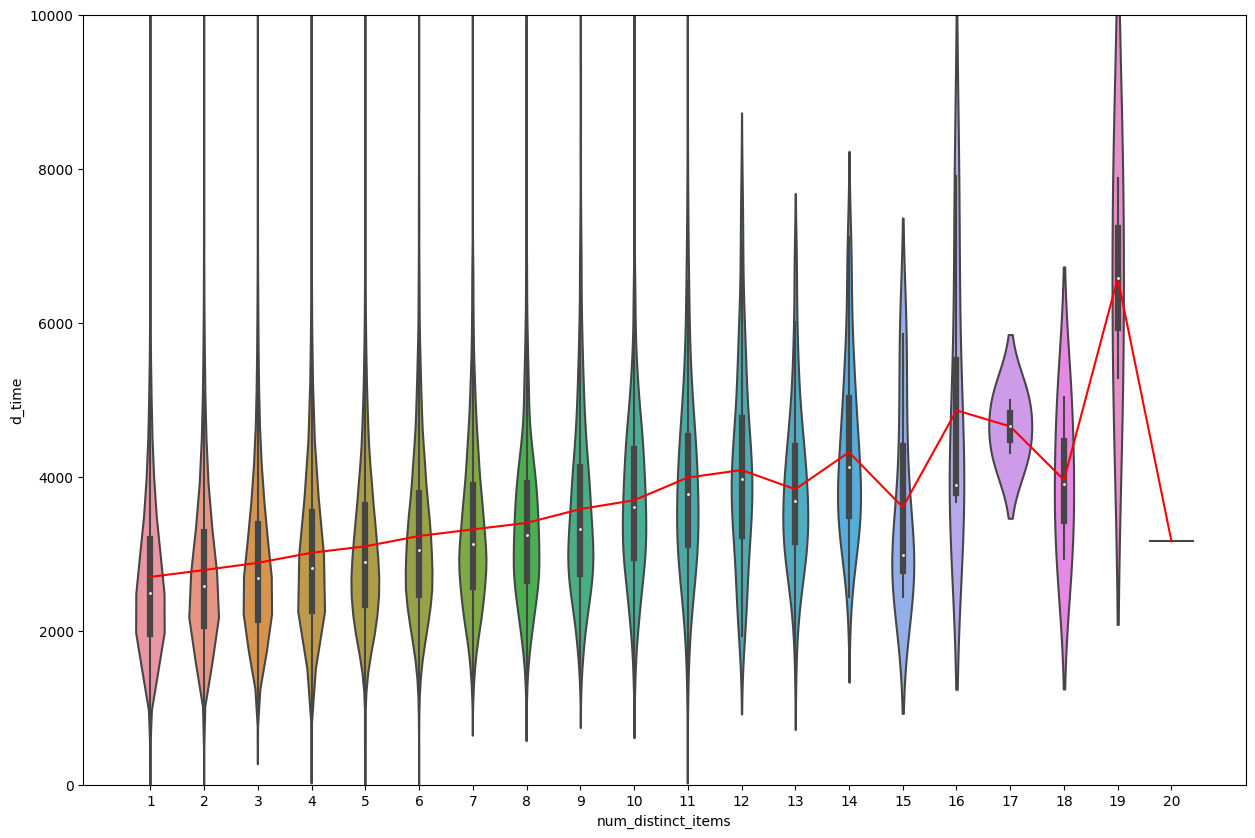

In [21]:
plt.figure(figsize=(15,10))
mean_dtime_by_ditems = df.groupby('num_distinct_items')['d_time'].mean()

sns.violinplot(data=df, x='num_distinct_items', y='d_time')
sns.lineplot(x=mean_dtime_by_ditems.index-1 ,y=mean_dtime_by_ditems, color='red')

plt.ylim(0,10000)
plt.show()

`13`, `15` 건을 제외하고는 확실히 비중복 품목이 많아질수록 배달 시간이 늘어나는 것이 확인된다

## 4. 지역 상황 속성

### I. 현재 가능한 배달원 수

- 배달원의 총 수보다는 현재 가능한 배달원이 몇 인지 아는게 중요해 보인다.
- `total_onshift` - `total_busy` 가 현재 가능한 배달원 수이다.
- 만약 해당 데이터가 음수인 경우는 고려하지 않는다.

In [32]:
df['active_onshift'] = df['total_onshift'] - df['total_busy']

In [33]:
active = df.copy()
active = active[active['active_onshift'] >= 0]

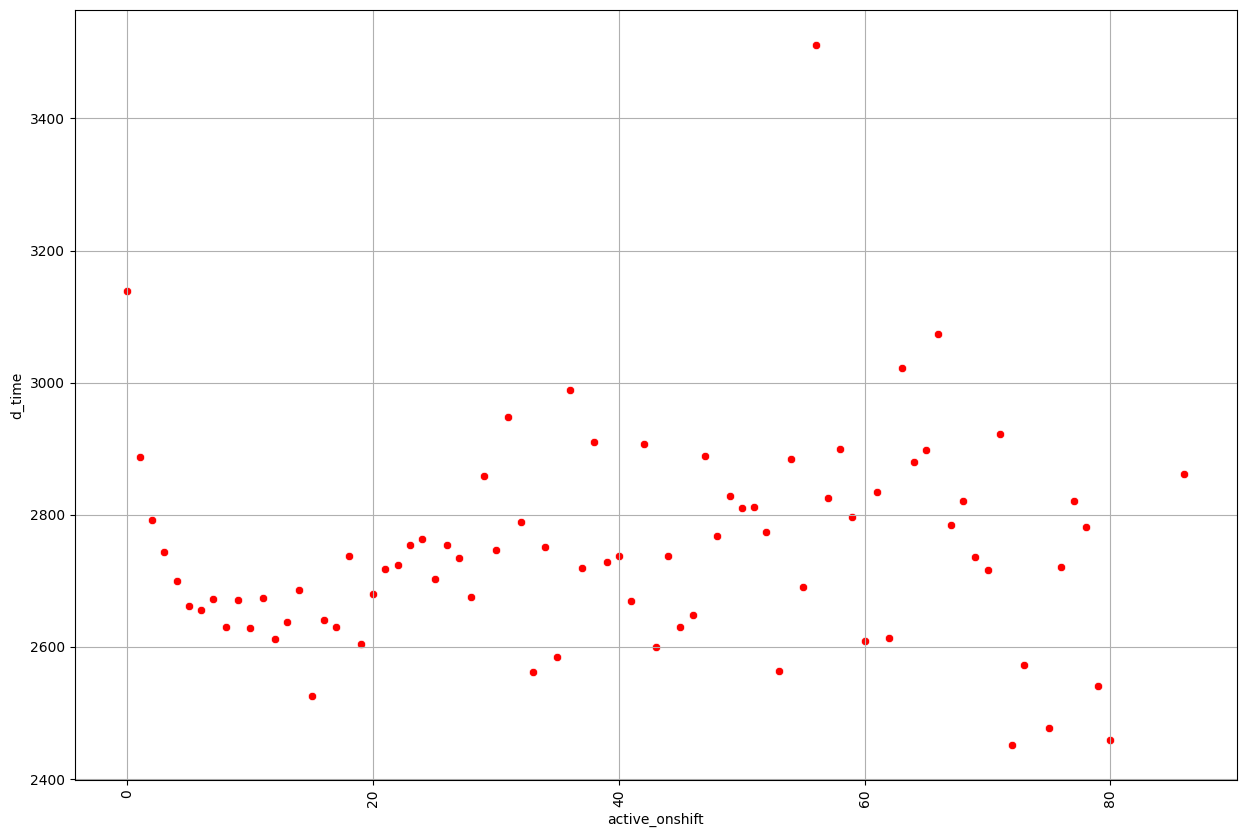

In [34]:
plt.figure(figsize=(15,10))
mean_dtime_by_active = active.groupby('active_onshift')['d_time'].mean()

# sns.violinplot(data=active, x='active_onshift', y='d_time')
sns.scatterplot(x=mean_dtime_by_active.index ,y=mean_dtime_by_active, color='red')

plt.xticks(rotation=90)
plt.grid()
plt.show()

배달원 수가 적을 때에는 배달원 수가 늘어날수록 배달 시간이 줄어들다가 어느 지점부터는 산포된 분포인 것을 확인할 수 있다. 따라서 이 부분도 고려하지 않겠다.

### II. 주문한 가게로부터 10마일 이내에 있는 다른 주문들의 수

- 다른 가게의 주문에 밀려 배달이 지연될 수도 있지 않을까?

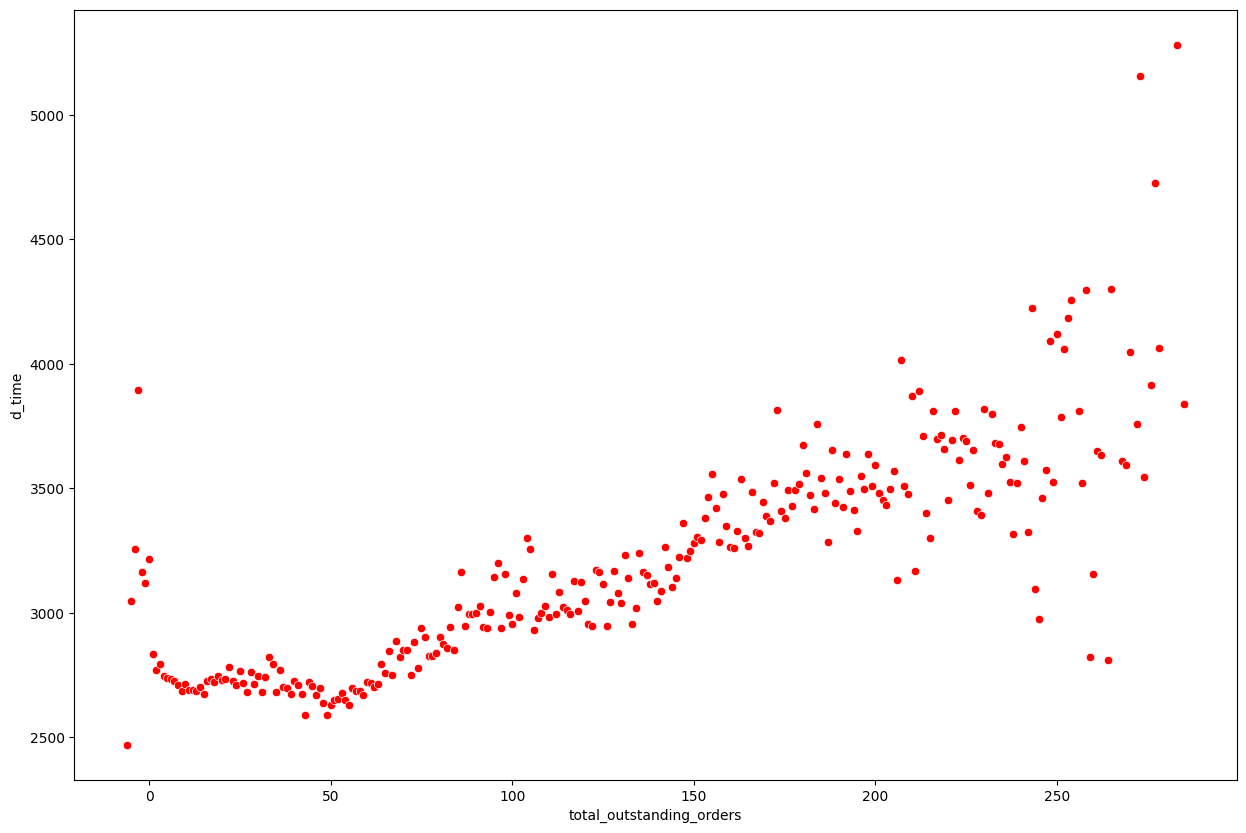

In [22]:
plt.figure(figsize=(15,10))
mean_dtime_by_outstanding = df.groupby('total_outstanding_orders')['d_time'].mean()

# sns.violinplot(data=train, x='total_outstanding_orders', y='d_time')
sns.scatterplot(x=mean_dtime_by_outstanding.index ,y=mean_dtime_by_outstanding, color='red')

plt.xticks(np.arange(0,300,50))
plt.show()

주문이 많을수록 시간이 오래 걸리는 것으로 보인다.

## 5. 데이터 정리

- 사용하는 칼럼: `num_distinct_items`, `total_outstanding_orders`

### I. 결측값 처리

In [23]:
df_copy = df.copy()

In [24]:
df_copy = df_copy[['store_category_bin', 'order_protocol', 'num_distinct_items', 'total_outstanding_orders','d_time']]

In [25]:
df_copy.isna().sum()

store_category_bin              0
order_protocol                488
num_distinct_items              0
total_outstanding_orders    15717
d_time                          7
dtype: int64

전부 drop 하겠다.

In [26]:
df_copy = df_copy.dropna(subset='store_category_bin')

In [27]:
df_copy = df_copy.dropna(subset='order_protocol')

In [28]:
df_copy = df_copy.dropna(subset='total_outstanding_orders')

In [29]:
df_copy = df_copy.dropna(subset='d_time')

In [30]:
df_copy.isna().sum()

store_category_bin          0
order_protocol              0
num_distinct_items          0
total_outstanding_orders    0
d_time                      0
dtype: int64

### ~~II. LabelEncoding.~~

- ~~`store_primary_category`의 경우 수치형이 아니기 때문에 수치형으로 바꿔줘야 한다.~~
- ~~순서와 관련없는 data이기 때문에 one-hot-encoding 방식을 사용하도록 하겠다.~~

In [ ]:
# store_cat_oh = pd.get_dummies(df_copy['store_primary_category'])
# store_cat_oh

In [ ]:
# df_oh = pd.concat([df_copy,store_cat_oh], axis=1).drop(columns=['store_primary_category'])
# df_oh

### III. 테스트 데이터 분리

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_copy, test_size=0.1, random_state=42)

In [32]:
len(train), len(test)

(158839, 17649)

### IV. X, y 분리

In [33]:
X_train = train.drop(columns=['d_time'])
y_train = train['d_time']

X_test = test.drop(columns=['d_time'])
y_test = test['d_time']

In [34]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [35]:
y_train = y_train[:,None]
y_test = y_test[:, None]

### V. 스케일 다운

- 대부분의 데이터가 정규분포 형태를 따르는 것 같다. 정규화로 스케일 다운을 하겠다.

In [36]:
X_train

array([[  0.,   2.,   3.,  80.],
       [  0.,   2.,   2.,  61.],
       [  0.,   2.,   1.,  71.],
       ...,
       [  0.,   1.,   2.,  19.],
       [  1.,   3.,   1.,  31.],
       [  0.,   3.,   2., 135.]])

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [38]:
X_train

array([[-1.06010772, -0.60232631,  0.20058449,  0.41338619],
       [-1.06010772, -0.60232631, -0.41353732,  0.05285692],
       [-1.06010772, -0.60232631, -1.02765913,  0.24260917],
       ...,
       [-1.06010772, -1.263028  , -0.41353732, -0.74410252],
       [ 0.94330037,  0.05837538, -1.02765913, -0.51639982],
       [-1.06010772,  0.05837538, -0.41353732,  1.45702355]])

In [39]:
X_test

array([[-1.06010772,  1.37977877, -0.41353732,  0.96366771],
       [ 0.94330037, -1.263028  ,  1.42882811, -0.13689533],
       [-1.06010772,  1.37977877,  0.20058449,  1.38112265],
       ...,
       [-1.06010772, -1.263028  ,  0.20058449, -0.91487954],
       [ 0.94330037,  0.05837538, -0.41353732,  0.90674203],
       [-1.06010772, -0.60232631,  0.20058449,  1.70370147]])

## 모델링

### I. Loss 정의

- Root Mean Square Error 사용
-  under-prediction의 경우를 우선적으로
    - `y_pred` 가 `y` 보다 큰 것은 over-prediction, 이와 같은 경우는 loss 값을 절반만 준다.

In [40]:
def rmse(y, y_pred):
  error = y_pred - y
  # 만약 error의 원소가 양수일 경우는 over-prediction이므로 이에 대한 loss 값은 절반만 주기로 한다.
  error = np.where(error>0,error/2,error)
  return np.sqrt(np.mean(error**2))

### II. Scorer 정의

- `RMSE` loss와 Under-prediction accuracy로 평가를 한다.
- 여기서 사용하는 `RMSE`는 위의 loss와 같이 under-prediction에 초점을 둔 것이 아닌 일반적인 `RMSE`이다.

In [41]:
def rmse_score(y, y_pred):
  error = y_pred - y
  return np.sqrt(np.mean(error**2))

In [42]:
def under_predict_accuracy(y, y_pred):
  return round(np.sum(y>y_pred) / len(y),4)

In [43]:
from sklearn.metrics import make_scorer

score = make_scorer(rmse_score, greater_is_better=False)

### III. Model 정의

#### a. LinearRegression Only

`sklearn`에서 제공하는 `LinearRegression` 모델이다. 이 모델은 loss fuction으로 `MSE`를 사용한다.

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
print("Train Data Score")
print("RMSE Score:", score(X=X_train, y_true=y_train, estimator=lr))
print("Under-prediction Accuracy:", under_predict_accuracy(y_train, lr.predict(X_train)))

Train Data Score
RMSE Score: -1147.7948020623992
Under-prediction Accuracy: 0.4082


In [47]:
print("Test Data Score")
print("RMSE Score:", score(X=X_test, y_true=y_test, estimator=lr))
print("Under-prediction Accuracy:", under_predict_accuracy(y_test, lr.predict(X_test)))

Test Data Score
RMSE Score: -1070.304355440922
Under-prediction Accuracy: 0.4161


#### b. Ridge

L2 규제를 추가하겠다.

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge()

In [49]:
ridge.fit(X_train, y_train)

Ridge()

In [50]:
print("Train Data Score")
print("RMSE Score:", score(X=X_train, y_true=y_train, estimator=ridge))
print("Under-prediction Accuracy:", under_predict_accuracy(y_train, ridge.predict(X_train)))

Train Data Score
RMSE Score: -1147.7948020637798
Under-prediction Accuracy: 0.4082


In [51]:
print("Test Data Score")
print("RMSE Score:", score(X=X_test, y_true=y_test, estimator=ridge))
print("Under-prediction Accuracy:", under_predict_accuracy(y_test, ridge.predict(X_test)))

Test Data Score
RMSE Score: -1070.3043264765342
Under-prediction Accuracy: 0.4161


`Ridge`와 `LinearRegression` 에 차이가 안 보였다.

#### c. LinearRegression with Customized RMSE

직접 구현한 loss를 써보겠다.

In [61]:
class LinearRegression:
  def __init__(self, n_features):
    self.W = np.random.randn(n_features, 1)
    self.b = np.random.randn()

  def predict(self, X):
    return X.dot(self.W) + self.b

  def fit(self, X, y, lr=0.01, n_epochs=1000, batch_size=32):
    n_samples = X.shape[0]
    n_batches = n_samples // batch_size
    if n_samples % batch_size != 0:
      n_batches += 1

    for i in range(n_epochs):
      for j in range(n_batches):
        batch_start = j * batch_size
        batch_end = (j + 1) * batch_size
        X_batch = X[batch_start:batch_end]
        y_batch = y[batch_start:batch_end]

        y_pred = self.predict(X_batch)

        loss = rmse(y_batch, y_pred)

        error = y_pred - y_batch
        error = np.where(error>0,error/2,error)

        # dW = X_batch.T.dot(y_pred - y_batch) / len(y_batch)
        dW = X_batch.T.dot(error) / len(y_batch)
        db = np.mean(y_pred - y_batch)

        self.W -= lr * dW
        self.b -= lr * db

      if i % 100 == 0:
        print('Epoch %d, Loss %.4f' % (i, loss))


In [62]:
lr_rmse = LinearRegression(n_features=X_train.shape[1])

In [63]:
lr_rmse.fit(X_train, y_train, batch_size=256)

Epoch 0, Loss 780.8535
Epoch 100, Loss 778.8528
Epoch 200, Loss 778.8528
Epoch 300, Loss 778.8528
Epoch 400, Loss 778.8528
Epoch 500, Loss 778.8528
Epoch 600, Loss 778.8528
Epoch 700, Loss 778.8528
Epoch 800, Loss 778.8528
Epoch 900, Loss 778.8528


In [64]:
print("Train Data Score")
print("RMSE Score:", score(X=X_train, y_true=y_train, estimator=lr_rmse))
print("Under-prediction Accuracy:", under_predict_accuracy(y_train, lr_rmse.predict(X_train)))

Train Data Score
RMSE Score: -1147.9767397788248
Under-prediction Accuracy: 0.4123


In [65]:
print("Test Data Score")
print("RMSE Score:", score(X=X_test, y_true=y_test, estimator=lr_rmse))
print("Under-prediction Accuracy:", under_predict_accuracy(y_test, lr_rmse.predict(X_test)))

Test Data Score
RMSE Score: -1070.5781359732184
Under-prediction Accuracy: 0.4193


#### d. LinearRegression with Gaussian Feature

데이터가 전반적으로 가우시안 분포의 형태를 띄우고 있었다.

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

In [81]:
gf = GaussianFeatures(32)
X_G = gf.fit_transform(X_train)

In [82]:
X_test_G = gf.transform(X_test)

In [83]:
X_G.shape

(158839, 32)

In [84]:
lr_rmse_gf = LinearRegression(n_features=X_G.shape[1])

In [85]:
lr_rmse_gf.fit(X_G, y_train, batch_size=256)

Epoch 0, Loss 863.3492
Epoch 100, Loss 883.1416
Epoch 200, Loss 882.6152
Epoch 300, Loss 882.5378
Epoch 400, Loss 882.5978
Epoch 500, Loss 882.7062
Epoch 600, Loss 882.8310
Epoch 700, Loss 882.9593
Epoch 800, Loss 883.0858
Epoch 900, Loss 883.2084


In [86]:
print("Train Data Score")
print("RMSE Score:", score(X=X_G, y_true=y_train, estimator=lr_rmse_gf))
print("Under-prediction Accuracy:", under_predict_accuracy(y_train, lr_rmse_gf.predict(X_G)))

Train Data Score
RMSE Score: -1217.8536069147374
Under-prediction Accuracy: 0.425


In [87]:
print("Test Data Score")
print("RMSE Score:", score(X=X_test_G, y_true=y_test, estimator=lr_rmse_gf))
print("Under-prediction Accuracy:", under_predict_accuracy(y_test, lr_rmse_gf.predict(X_test_G)))

Test Data Score
RMSE Score: -1140.1174256638587
Under-prediction Accuracy: 0.4319


성능이 약간 좋아진 것을 확인할 수 있었다.

#### e. RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor()

In [90]:
rf.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [91]:
print("Train Data Score")
print("RMSE Score:", score(X=X_train, y_true=y_train.ravel(), estimator=rf))
print("Under-prediction Accuracy:", under_predict_accuracy(y_train.ravel(), rf.predict(X_train)))

Train Data Score
RMSE Score: -1077.3930807373713
Under-prediction Accuracy: 0.423


In [92]:
print("Test Data Score")
print("RMSE Score:", score(X=X_test, y_true=y_test.ravel(), estimator=rf))
print("Under-prediction Accuracy:", under_predict_accuracy(y_test.ravel(), rf.predict(X_test)))

Test Data Score
RMSE Score: -1110.1334936798764
Under-prediction Accuracy: 0.4295


현재 시험해본 모델들 중에서 가장 좋은 성능을 도출한다. 이는 이상치가 많은 데이터에서 RF의 성능이 좋기 때문인 것으로 추측된다.

### 모델 성능 차이 시각화

In [93]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for model in (lr, ridge, lr_rmse, lr_rmse_gf, rf):
  if model == lr_rmse_gf:
    trX = X_G[:]
    teX = X_test_G[:]
  else:
    trX = X_train[:]
    teX = X_test[:]
  
  if model == rf:
    tr_scr = score(X=trX, y_true=y_train.ravel(), estimator=model)
    tr_acc = under_predict_accuracy(y_train.ravel(), model.predict(trX))

    te_scr = score(X=teX, y_true=y_test.ravel(), estimator=model)
    te_acc = under_predict_accuracy(y_test.ravel(), model.predict(teX))
  else:
    tr_scr = score(X=trX, y_true=y_train, estimator=model)
    tr_acc = under_predict_accuracy(y_train, model.predict(trX))

    te_scr = score(X=teX, y_true=y_test, estimator=model)
    te_acc = under_predict_accuracy(y_test, model.predict(teX))
  
  train_loss.append(tr_scr)
  train_acc.append(tr_acc)
  test_loss.append(te_scr)
  test_acc.append(te_acc)


In [94]:
models_state = pd.DataFrame(
    index=['lr','ridge','lr_rmse','lr_rmse_gf','rf'],
    columns=['train_loss','test_loss','train_acc','test_acc'],
    data=zip(train_loss,test_loss,train_acc,test_acc)
)

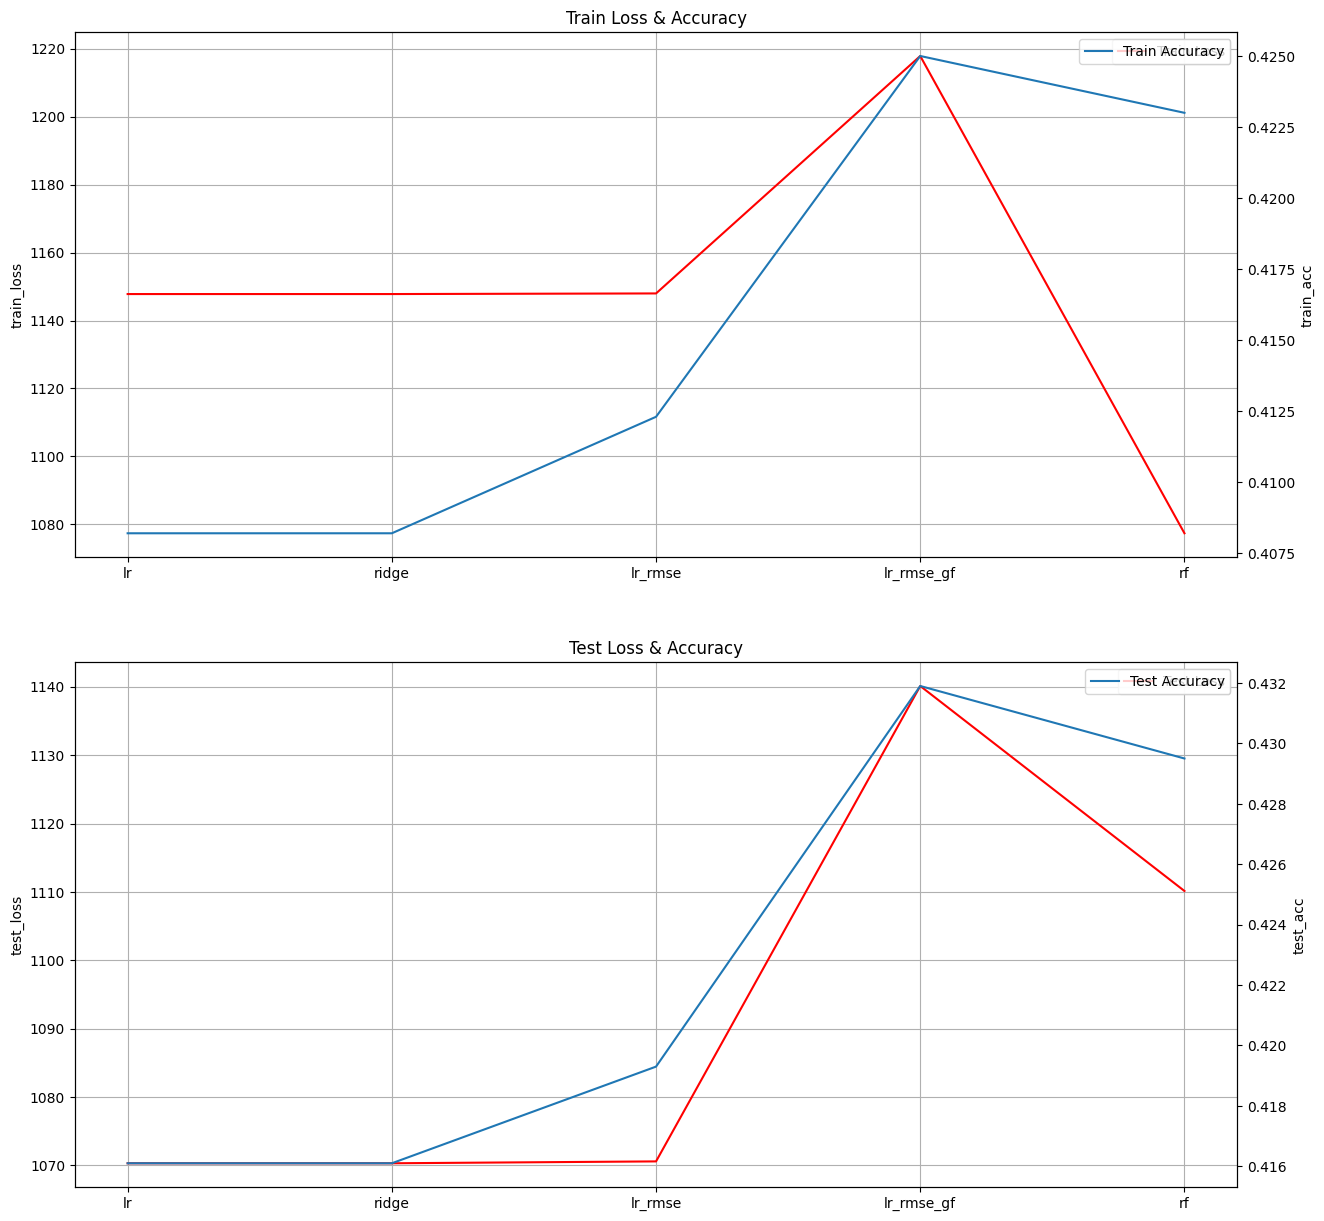

In [95]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))

ax1.set_title('Train Loss & Accuracy')
ax2.set_title('Test Loss & Accuracy')

ax1_right = ax1.twinx()
ax2_right = ax2.twinx()

sns.lineplot(x=models_state.index, y=abs(models_state['train_loss']), ax=ax1, color='red', label='Train Loss')
sns.lineplot(x=models_state.index, y=abs(models_state['test_loss']), ax=ax2, color='red', label='Test Loss')
sns.lineplot(x=models_state.index, y=abs(models_state['train_acc']), ax=ax1_right, label='Train Accuracy')
sns.lineplot(x=models_state.index, y=abs(models_state['test_acc']), ax=ax2_right, label='Test Accuracy')

ax1.grid()
ax2.grid()

plt.show()